Notebook com o intuito de submeter o RFE_RAG a uma serie de testes para ver como ele se sai respondendo um conjunto de perguntas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# RFE_RAG

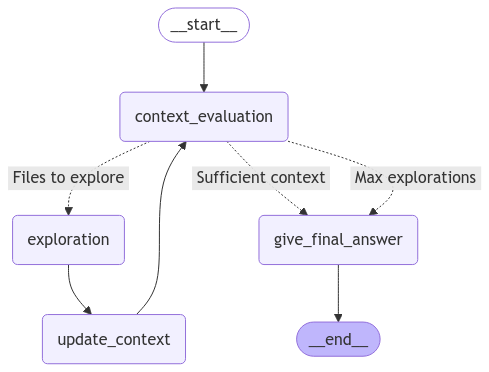

In [2]:
import os
from utils import display_app_graph
from dotenv import load_dotenv

load_dotenv()

from langchain_openai import ChatOpenAI
gpt = ChatOpenAI(model="gpt-4o-mini")

from langchain_ollama import ChatOllama

llama3 = ChatOllama(
    model="llama3.1:8b",
    temperature=0,
)

llama3_structured = ChatOllama(
    model="llama3.1:8b",
    temperature=0,
    format='json'
)

# Rodando o modelo externamente no google colab, por isso o ngrok
ollama_api_url = "https://proven-wanted-squid.ngrok-free.app/"

qwen2 = ChatOllama(
    model="qwen2.5:14b",
    temperature=0,
    base_url=ollama_api_url
)

qwen2_structured = ChatOllama(
    model="qwen2.5:14b",
    temperature=0,
    format='json',
    base_url=ollama_api_url
)

from recursive_file_exploration_rag import RFERag

# modelo = "RFERag com GPT-4o-mini"
modelo = "RFERag com GPT-4o-mini"

rfe_rag = {
    "RFERag com GPT-4o-mini" : RFERag(
        llm = gpt,
        structured_llm=gpt,
        prompts_folder="./prompts"
    ),
    "RFERag com llama3.1:8b" : RFERag(
        llm = llama3,
        structured_llm=llama3_structured,
        prompts_folder="./prompts"
    ),
    "RFERag com qwen2.5:14b" : RFERag(
        llm = qwen2,
        structured_llm=qwen2_structured,
        prompts_folder="./prompts"
    )
}[modelo]

rfe_rag.display_app_graph()

# Base 1

In [ ]:
rfe_rag.datasources = {}
rfe_rag.add_datasource("./base de conhecimento 1")

Quantidade de perguntas: 30


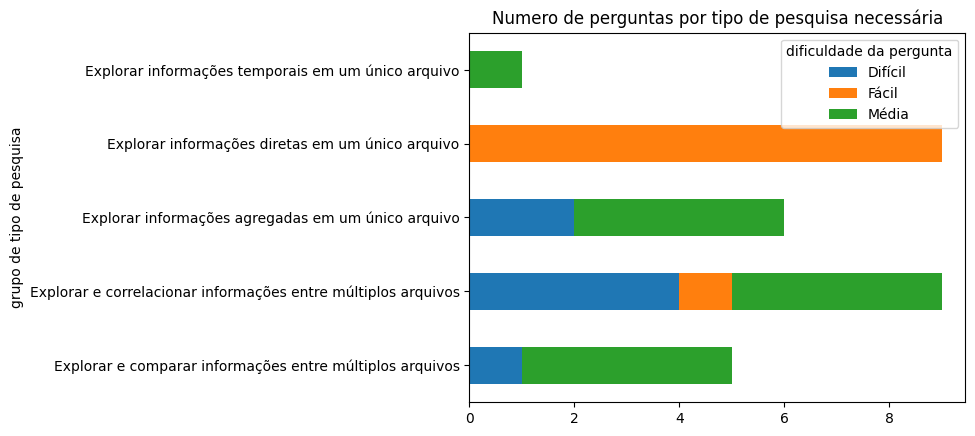

In [3]:
perguntas = [
    {
        "pergunta": "Qual o ramo da empresa que ganhou destaque?",
        "chave de resposta": "Varejo",
        "tipo de pesquisa necessaria": "Observar diretamente um único arquivo",
        "dificuldade da pergunta": "Fácil"
    },
    {
        "pergunta": "Qual é a empresa mais antiga?",
        "chave de resposta": "Empresa A",
        "tipo de pesquisa necessaria": "Comparar todos os arquivos de um tema",
        "dificuldade da pergunta": "Média"
    },
    {
        "pergunta": "Qual o resultado da empresa mais recente em janeiro?",
        "chave de resposta": "90",
        "tipo de pesquisa necessaria": "Observar diretamente um único arquivo",
        "dificuldade da pergunta": "Fácil"
    },
    {
        "pergunta": "Qual empresa foi fundada por alguém nascido no Rio de Janeiro?",
        "chave de resposta": "Não é possível responder com a base de conhecimento dada",
        "tipo de pesquisa necessaria": "Analisar múltiplos arquivos para correlacionar informações",
        "dificuldade da pergunta": "Difícil"
    },
    {
        "pergunta": "Quantas das empresas foram fundadas por alguém com 'Consultoria' dentre as competências?",
        "chave de resposta": "Nenhuma",
        "tipo de pesquisa necessaria": "Analisar múltiplos arquivos para correlacionar informações",
        "dificuldade da pergunta": "Difícil"
    },
    {
        "pergunta": "Quando foi fundada a empresa do ramo de software?",
        "chave de resposta": "Não é possível responder com a base de conhecimento dada",
        "tipo de pesquisa necessaria": "Comparar informações entre arquivos",
        "dificuldade da pergunta": "Média"
    },
    {
        "pergunta": "Quem fundou a empresa C?",
        "chave de resposta": "Carlos",
        "tipo de pesquisa necessaria": "Observar diretamente um único arquivo",
        "dificuldade da pergunta": "Fácil"
    },
    {
        "pergunta": "Qual é a média de resultados da empresa B e como ela se compara com a empresa A?",
        "chave de resposta": "Média da empresa B: 185; Média da empresa A: 155; Empresa B teve desempenho superior",
        "tipo de pesquisa necessaria": "Analisar e comparar dados de um arquivo",
        "dificuldade da pergunta": "Difícil"
    },
    {
        "pergunta": "Quais são as competências de Beatriz e como elas se relacionam com a empresa que fundou?",
        "chave de resposta": "Marketing Estratégico, Gestão de Varejo, Empreendedorismo; competências diretamente aplicáveis ao ramo de Varejo",
        "tipo de pesquisa necessaria": "Analisar múltiplos arquivos para correlacionar informações",
        "dificuldade da pergunta": "Média"
    },
    {
        "pergunta": "Quais empresas foram fundadas por pessoas nascidas em São Paulo e Manaus?",
        "chave de resposta": "Empresa A (São Paulo); Empresa fundada por alguém de Manaus não existe",
        "tipo de pesquisa necessaria": "Analisar e correlacionar dados de múltiplos arquivos",
        "dificuldade da pergunta": "Difícil"
    },
    {
        "pergunta": "Carlos é especialista em que área?",
        "chave de resposta": "Criptografia, Análise de Blockchain, Investimentos em Ativos Digitais",
        "tipo de pesquisa necessaria": "Observar diretamente um único arquivo",
        "dificuldade da pergunta": "Fácil"
    },
    {
        "pergunta": "A empresa C vem apresentando crescimento ou queda em seus resultados?",
        "chave de resposta": "Queda",
        "tipo de pesquisa necessaria": "Analisar dados ao longo do tempo em um único arquivo",
        "dificuldade da pergunta": "Média"
    },
    {
        "pergunta": "Qual é a principal área de atuação da empresa A?",
        "chave de resposta": "Tecnologia",
        "tipo de pesquisa necessaria": "Observar diretamente um único arquivo",
        "dificuldade da pergunta": "Fácil"
    },
    {
        "pergunta": "Em que ano a empresa B foi fundada?",
        "chave de resposta": "2015",
        "tipo de pesquisa necessaria": "Observar diretamente um único arquivo",
        "dificuldade da pergunta": "Fácil"
    },
    {
        "pergunta": "Qual é o resultado médio da empresa C?",
        "chave de resposta": "60",
        "tipo de pesquisa necessaria": "Calcular a média de dados em um arquivo",
        "dificuldade da pergunta": "Média"
    },
    {
        "pergunta": "Quais são as cidades de nascimento dos fundadores das empresas A e C?",
        "chave de resposta": "Empresa A: São Paulo; Empresa C: Curitiba",
        "tipo de pesquisa necessaria": "Correlacionar informações entre arquivos",
        "dificuldade da pergunta": "Média"
    },
    {
        "pergunta": "Qual empresa foi fundada mais recentemente?",
        "chave de resposta": "Empresa C",
        "tipo de pesquisa necessaria": "Comparar todos os arquivos de um tema",
        "dificuldade da pergunta": "Média"
    },
    {
        "pergunta": "Quais são as competências principais de Ana?",
        "chave de resposta": "Programação Avançada, Gestão de Projetos, Design de Interfaces",
        "tipo de pesquisa necessaria": "Observar diretamente um único arquivo",
        "dificuldade da pergunta": "Fácil"
    },
    {
        "pergunta": "Qual é o resultado total da empresa A ao longo de 12 meses?",
        "chave de resposta": "1860",
        "tipo de pesquisa necessaria": "Somar os valores de um arquivo",
        "dificuldade da pergunta": "Média"
    },
    {
        "pergunta": "Qual é o ramo de atuação da empresa C?",
        "chave de resposta": "Criptomoedas",
        "tipo de pesquisa necessaria": "Observar diretamente um único arquivo",
        "dificuldade da pergunta": "Fácil"
    },
    {
        "pergunta": "Quem fundou a empresa mais antiga?",
        "chave de resposta": "Ana",
        "tipo de pesquisa necessaria": "Correlacionar informações entre arquivos",
        "dificuldade da pergunta": "Média"
    },
    {
        "pergunta": "Qual é a diferença entre as especializações das empresas A e B?",
        "chave de resposta": "Empresa A: Tecnologia; Empresa B: Varejo",
        "tipo de pesquisa necessaria": "Comparar dados de dois arquivos",
        "dificuldade da pergunta": "Média"
    },
    {
        "pergunta": "Qual é a média de resultados das empresas A e C juntas?",
        "chave de resposta": "107.5",
        "tipo de pesquisa necessaria": "Calcular a média e comparar dados entre arquivos",
        "dificuldade da pergunta": "Difícil"
    },
    {
        "pergunta": "Qual empresa teve o maior resultado no mês de junho?",
        "chave de resposta": "Empresa B",
        "tipo de pesquisa necessaria": "Comparar valores de um arquivo específico",
        "dificuldade da pergunta": "Média"
    },
    {
        "pergunta": "Quais competências de Beatriz podem ser aplicadas à empresa que ela fundou?",
        "chave de resposta": "Marketing Estratégico, Gestão de Varejo, Empreendedorismo",
        "tipo de pesquisa necessaria": "Correlacionar informações entre arquivos",
        "dificuldade da pergunta": "Média"
    },
    {
        "pergunta": "Qual é a diferença total de resultados entre as empresas A e B em 12 meses?",
        "chave de resposta": "360",
        "tipo de pesquisa necessaria": "Comparar totais calculados de um arquivo",
        "dificuldade da pergunta": "Difícil"
    },
    {
        "pergunta": "Qual é a cidade natal de Carlos?",
        "chave de resposta": "Curitiba",
        "tipo de pesquisa necessaria": "Observar diretamente um único arquivo",
        "dificuldade da pergunta": "Fácil"
    },
    {
        "pergunta": "Quais empresas foram fundadas por pessoas nascidas em capitais brasileiras?",
        "chave de resposta": "Empresa A (São Paulo); Empresa B (Belo Horizonte); Empresa C (Curitiba)",
        "tipo de pesquisa necessaria": "Correlacionar informações entre arquivos",
        "dificuldade da pergunta": "Difícil"
    },
    {
        "pergunta": "Qual é o desempenho médio das três empresas no mês de março?",
        "chave de resposta": "120",
        "tipo de pesquisa necessaria": "Calcular a média de valores de um arquivo",
        "dificuldade da pergunta": "Média"
    },
    {
        "pergunta": "Quem fundou a empresa destacada no relatório?",
        "chave de resposta": "Beatriz",
        "tipo de pesquisa necessaria": "Correlacionar informações entre arquivos",
        "dificuldade da pergunta": "Fácil"
    }
]

df_perguntas = pd.DataFrame(perguntas)
mapeamento_tipos = {
    "Observar diretamente um único arquivo": "Explorar informações diretas em um único arquivo",
    "Comparar todos os arquivos de um tema": "Explorar e comparar informações entre múltiplos arquivos",
    "Calcular a média de dados em um arquivo": "Explorar informações agregadas em um único arquivo",
    "Somar os valores de um arquivo": "Explorar informações agregadas em um único arquivo",
    "Analisar e comparar dados de um arquivo": "Explorar informações agregadas em um único arquivo",
    "Comparar dados de dois arquivos": "Explorar e comparar informações entre múltiplos arquivos",
    "Correlacionar informações entre arquivos": "Explorar e correlacionar informações entre múltiplos arquivos",
    "Analisar dados ao longo do tempo em um único arquivo": "Explorar informações temporais em um único arquivo",
    "Analisar múltiplos arquivos para correlacionar informações": "Explorar e correlacionar informações entre múltiplos arquivos",
    "Comparar informações entre arquivos": "Explorar e comparar informações entre múltiplos arquivos",
    "Analisar e correlacionar dados de múltiplos arquivos": "Explorar e correlacionar informações entre múltiplos arquivos",
    "Calcular a média e comparar dados entre arquivos": "Explorar e comparar informações entre múltiplos arquivos",
    "Comparar valores de um arquivo específico": "Explorar informações agregadas em um único arquivo",
    "Comparar totais calculados de um arquivo": "Explorar informações agregadas em um único arquivo",
    "Calcular a média de valores de um arquivo": "Explorar informações agregadas em um único arquivo"
}

df_perguntas['grupo de tipo de pesquisa'] = df_perguntas['tipo de pesquisa necessaria'].map(mapeamento_tipos)

print(f"Quantidade de perguntas: {len(df_perguntas)}")
df_perguntas.groupby("grupo de tipo de pesquisa")['dificuldade da pergunta'].value_counts().unstack().plot(kind='barh', stacked=True).set_title("Numero de perguntas por tipo de pesquisa necessária")
plt.show()

In [15]:
from tqdm import tqdm

rfe_rag.max_exploration_counter = 3

model_answers = []
# already_answered = [answer["pergunta"] for answer in model_answers]
for index, row in tqdm(df_perguntas.iterrows(), total=len(df_perguntas)):
    question = row["pergunta"]
    # if question in already_answered:
    #     continue
    answer = rfe_rag.answer(question)
    model_answers.append({
        "modelo": modelo,
        "pergunta": question,
        "resposta": answer["answer"],
        "contexto": answer["context"],
        "numero de iterações de exploração": answer["exploration_counter"],
        "número de arquivos explorados": answer["num_explorations"]
    })

df_respostas = pd.DataFrame(model_answers)
df_respostas.to_parquet(f"./respostas/respostas base_1 - {modelo}.parquet")
df_respostas

  0%|          | 0/30 [00:00<?, ?it/s]

An error occurred while reading the file: [Errno 2] No such file or directory: 'c:/Users/lucas/OneDrive/Documentos/Recursive-file-exploration-RAG/base de conhecimento 1/sobre a empresa A.md'
c:/Users/lucas/OneDrive/Documentos/Recursive-file-exploration-RAG/base de conhecimento 1/sobre a empresa A.md


100%|██████████| 30/30 [23:22<00:00, 46.76s/it]


,modelo,pergunta,resposta,contexto,numero de iterações de exploração,número de arquivos explorados
0,RFERag com qwen2.5:14b,Qual o ramo da empresa que ganhou destaque?,"Com base nas informações disponíveis, o ramo d...",\n Avaliable datasources:\n '{'c:/Users/...,1,2
1,RFERag com qwen2.5:14b,Qual é a empresa mais antiga?,Com base nas informações fornecidas pelos arqu...,\n Avaliable datasources:\n '{'c:/Users/...,1,3
2,RFERag com qwen2.5:14b,Qual o resultado da empresa mais recente em ja...,Com base nas informações fornecidas sobre o pr...,\n Avaliable datasources:\n '{'c:/Users/...,3,3
3,RFERag com qwen2.5:14b,Qual empresa foi fundada por alguém nascido no...,"Com base nas informações fornecidas, não há ne...",\n Avaliable datasources:\n '{'c:/Users/...,3,15
4,RFERag com qwen2.5:14b,Quantas das empresas foram fundadas por alguém...,Com base nas informações disponíveis e nos arq...,\n Avaliable datasources:\n '{'c:/Users/...,3,9
5,RFERag com qwen2.5:14b,Quando foi fundada a empresa do ramo de software?,"Com base nas informações disponíveis, a Empres...",\n Avaliable datasources:\n '{'c:/Users/...,1,3
6,RFERag com qwen2.5:14b,Quem fundou a empresa C?,"De acordo com as informações disponíveis, a em...",\n Avaliable datasources:\n '{'c:/Users/...,1,1
7,RFERag com qwen2.5:14b,Qual é a média de resultados da empresa B e co...,"Com base nas informações disponíveis, a média ...",\n Avaliable datasources:\n '{'c:/Users/...,1,3
8,RFERag com qwen2.5:14b,Quais são as competências de Beatriz e como el...,"Com base nas informações exploradas, podemos c...",\n Avaliable datasources:\n '{'c:/Users/...,1,2
9,RFERag com qwen2.5:14b,Quais empresas foram fundadas por pessoas nasc...,"Com base nas informações disponíveis, podemos ...",\n Avaliable datasources:\n '{'c:/Users/...,3,8


In [16]:
df_respostas = pd.DataFrame(model_answers)
df_respostas.to_parquet(f"./respostas/respostas base_1 - {modelo}.parquet")


In [17]:
df_respostas = pd.read_parquet(f"./respostas/respostas base_1 - {modelo}.parquet")
df_respostas = pd.merge(df_respostas, df_perguntas, on="pergunta")

## Avaliação das respostas

In [18]:
from utils import Avaliador

avaliador = Avaliador(gpt, "./resumo da base de conhecimento 1.md", "./prompts/avaliacao_de_respostas.jinja2")

df_respostas[["integralidade", "aderencia a chave de resposta", "precisao e conformidade", "informacoes extras", "nota final", "justificativa da nota"]] = df_respostas.apply(lambda row: pd.Series(avaliador.avaliar_linha(row)), axis=1)

Text(0.5, 1.0, 'Nota final das respostas por tipo de pesquisa necessária')

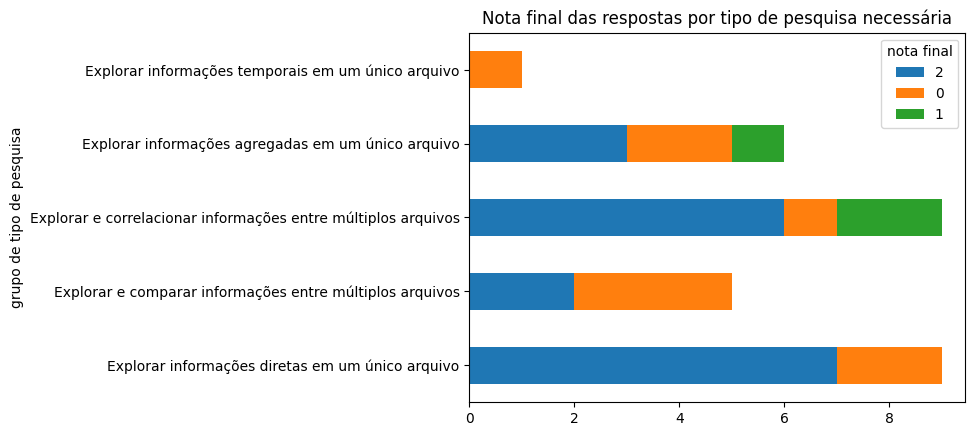

In [19]:
df_respostas.groupby(["grupo de tipo de pesquisa"], sort=False)["nota final"].value_counts().unstack().plot(kind='barh', stacked=True).set_title("Nota final das respostas por tipo de pesquisa necessária")

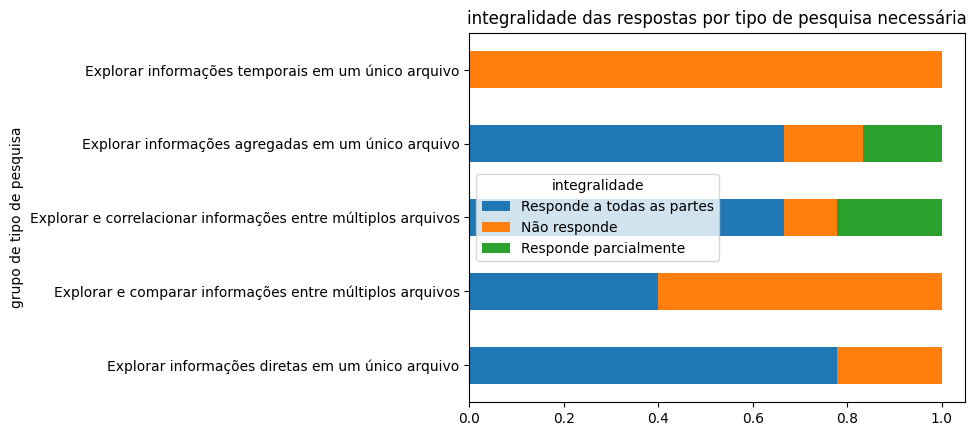

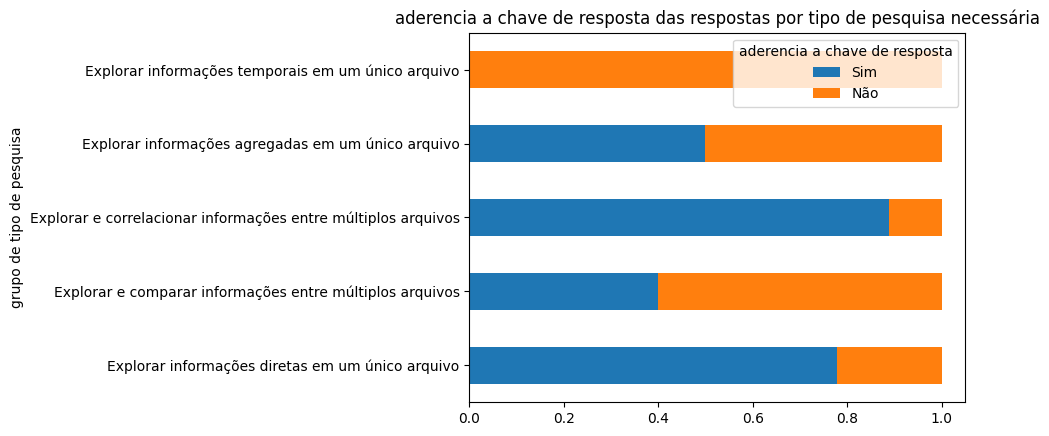

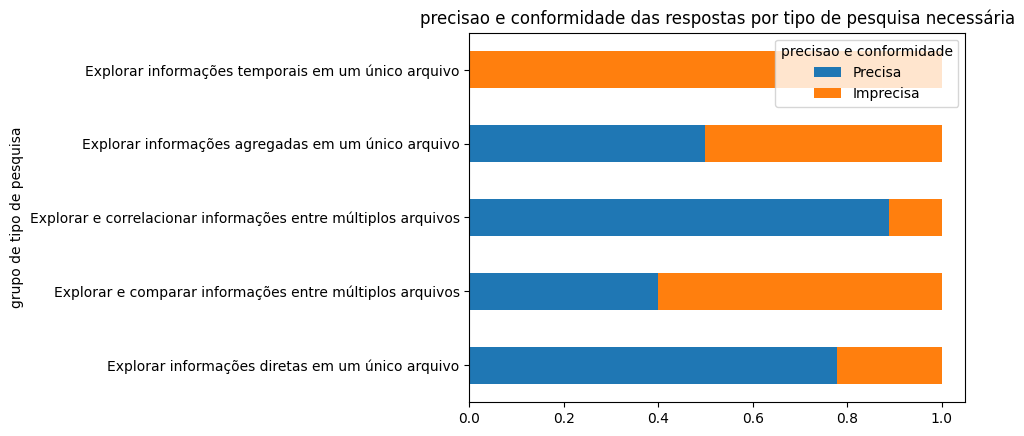

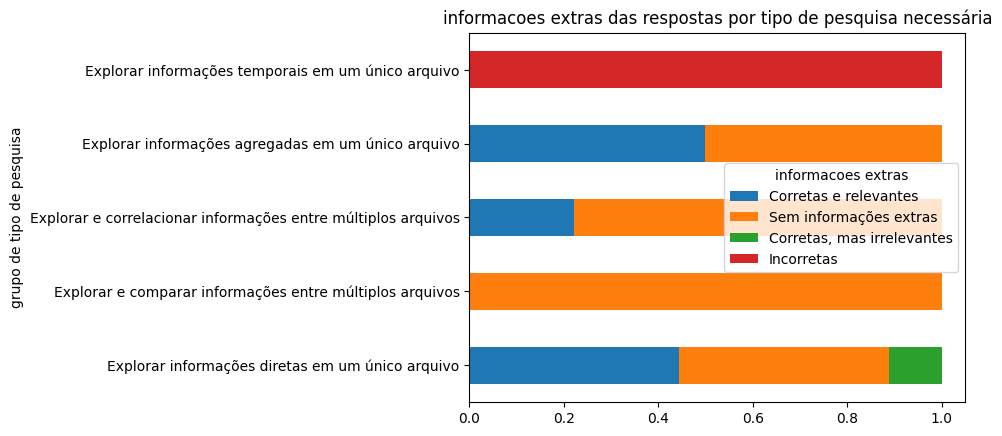

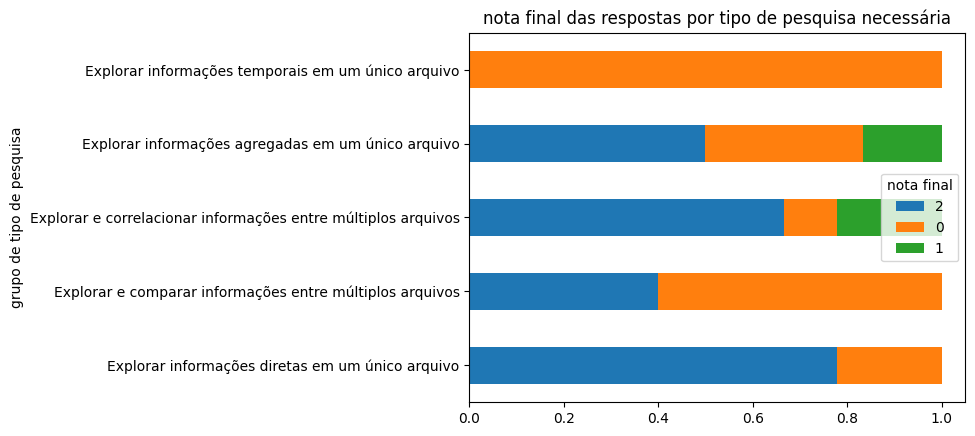

In [20]:
for criterio in ["integralidade", "aderencia a chave de resposta", "precisao e conformidade", "informacoes extras", "nota final"]:
    agg = df_respostas.groupby(["grupo de tipo de pesquisa"], sort=False)[criterio].value_counts(normalize=True).unstack().fillna(0)
    agg.plot(kind='barh', stacked=True).set_title(f"{criterio} das respostas por tipo de pesquisa necessária")

In [21]:
df_respostas.to_parquet(f"./respostas/respostas avaliadas base_1 - {modelo}.parquet")

# Base de conhecimento 2

In [3]:
rfe_rag.datasources = {}
rfe_rag.add_datasource("./base de conhecimento 2")

Quantidade de perguntas: 17


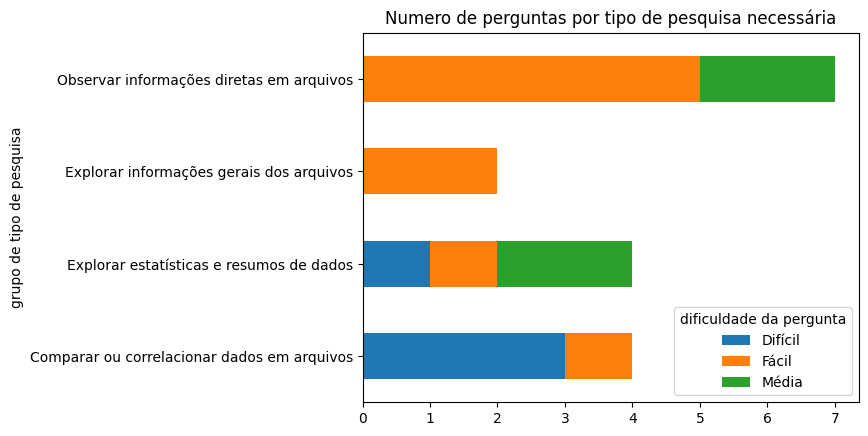

In [9]:
dados_sensores = pd.read_csv("./base de conhecimento 2/dados_sensores.csv")
perguntas_base_marte = [
    # Perguntas Gerais
    {
        "pergunta": "Sobre o que fala a base de conhecimento?",
        "chave de resposta": "Exploração científica em Marte, incluindo dados meteorológicos, geológicos e missões.",
        "tipo de pesquisa necessaria": "Analisar os arquivos disponíveis no geral.",
        "dificuldade da pergunta": "Fácil"
    },
    {
        "pergunta": "Qual é o nome do local específico de pouso na imagem?",
        "chave de resposta": "Noctis Landing",
        "tipo de pesquisa necessaria": "Observar diretamente a imagem.",
        "dificuldade da pergunta": "Fácil"
    },
    {
        "pergunta": "Quais locais estão destacados próximos a Valles Marineris?",
        "chave de resposta": "Tithonium Chasma, Ius Chasma, Noctis Labyrinthus, Sinai Planum.",
        "tipo de pesquisa necessaria": "Observar diretamente a imagem.",
        "dificuldade da pergunta": "Fácil"
    },
    {
        "pergunta": "Quantos registros de medições existem na tabela de dados de sensores?",
        "chave de resposta": str(len(dados_sensores)),
        "tipo de pesquisa necessaria": "Analisar a quantidade de registros na tabela CSV.",
        "dificuldade da pergunta": "Fácil"
    },
    {
        "pergunta": "Quais são as colunas presentes no arquivo de dados dos sensores?",
        "chave de resposta": "Data, Localização, Temperatura (°C), Pressão (Pa), Radiação (mSv/h).",
        "tipo de pesquisa necessaria": "Observar diretamente o cabeçalho da tabela CSV.",
        "dificuldade da pergunta": "Fácil"
    },
    # Perguntas de Análise de Dados
    {
        "pergunta": "Qual foi a temperatura média registrada em todas as medições?",
        "chave de resposta": f"{dados_sensores['Temperatura (°C)'].mean():.2f} °C",
        "tipo de pesquisa necessaria": "Calcular a média da coluna 'Temperatura (°C)' no arquivo CSV.",
        "dificuldade da pergunta": "Média"
    },
    {
        "pergunta": "Qual foi o valor de pressão mais alto registrado?",
        "chave de resposta": f"{dados_sensores['Pressão (Pa)'].max()} Pa",
        "tipo de pesquisa necessaria": "Observar o valor máximo na coluna 'Pressão (Pa)'.",
        "dificuldade da pergunta": "Fácil"
    },
    {
        "pergunta": "Em qual data foi registrada a menor radiação?",
        "chave de resposta": f"{dados_sensores.loc[dados_sensores['Radiação (mSv/h)'].idxmin(), 'Data']}",
        "tipo de pesquisa necessaria": "Localizar o menor valor na coluna 'Radiação' e associá-lo à data correspondente.",
        "dificuldade da pergunta": "Média"
    },
    {
        "pergunta": "Quantas localizações diferentes estão listadas nos dados dos sensores?",
        "chave de resposta": f"{dados_sensores['Localização'].nunique()}",
        "tipo de pesquisa necessaria": "Contar os valores únicos da coluna 'Localização'.",
        "dificuldade da pergunta": "Média"
    },
    {
        "pergunta": "Qual foi a localização com a maior temperatura registrada?",
        "chave de resposta": f"{dados_sensores.loc[dados_sensores['Temperatura (°C)'].idxmax(), 'Localização']}",
        "tipo de pesquisa necessaria": "Encontrar o valor máximo em 'Temperatura' e identificar a localização correspondente.",
        "dificuldade da pergunta": "Difícil"
    },
    # Perguntas sobre o Notebook Jupyter
    {
        "pergunta": "O que o notebook de análise meteorológica analisa?",
        "chave de resposta": "Analisa dados de temperatura e pressão para prever padrões meteorológicos.",
        "tipo de pesquisa necessaria": "Observar o conteúdo do notebook.",
        "dificuldade da pergunta": "Fácil"
    },
    {
        "pergunta": "Qual biblioteca é usada para visualizar os dados no notebook?",
        "chave de resposta": "Matplotlib",
        "tipo de pesquisa necessaria": "Observar o código do notebook Jupyter.",
        "dificuldade da pergunta": "Fácil"
    },
    {
        "pergunta": "O notebook processa algum arquivo de dados? Se sim, qual?",
        "chave de resposta": "Sim, o arquivo 'dados_sensores.csv'.",
        "tipo de pesquisa necessaria": "Verificar a célula de leitura de arquivos no notebook.",
        "dificuldade da pergunta": "Fácil"
    },
    {
        "pergunta": "Qual gráfico é gerado pelo notebook de análise meteorológica?",
        "chave de resposta": "Um gráfico de variação de temperatura ao longo do tempo.",
        "tipo de pesquisa necessaria": "Observar o código e os gráficos gerados no notebook.",
        "dificuldade da pergunta": "Média"
    },
    # Perguntas Avançadas (Requerem análise de múltiplos dados)
    {
        "pergunta": "Em qual dia a radiação esteve acima de 0.1 mSv/h?",
        "chave de resposta": list(dados_sensores[dados_sensores['Radiação (mSv/h)'] > 0.1]['Data']),
        "tipo de pesquisa necessaria": "Filtrar os dados da tabela por valores de radiação.",
        "dificuldade da pergunta": "Difícil"
    },
    {
        "pergunta": "Existe algum dia com temperatura e pressão iguais em diferentes localizações?",
        "chave de resposta": "Sim ou não, dependendo da análise dos dados.",
        "tipo de pesquisa necessaria": "Comparar registros duplicados com base em temperatura e pressão.",
        "dificuldade da pergunta": "Difícil"
    },
    {
        "pergunta": "Qual é a variação total de temperatura no local 18.3°N 77.5°E?",
        "chave de resposta": f"{dados_sensores[dados_sensores['Localização'] == '18.3°N 77.5°E']['Temperatura (°C)'].max() - dados_sensores[dados_sensores['Localização'] == '18.3°N 77.5°E']['Temperatura (°C)'].min():.2f} °C",
        "tipo de pesquisa necessaria": "Filtrar dados e calcular a diferença entre valores máximos e mínimos.",
        "dificuldade da pergunta": "Difícil"
    }
]


df_perguntas = pd.DataFrame(perguntas_base_marte)
mapeamento_tipos = {
    "Explorar informações gerais dos arquivos": [
        "Analisar os arquivos disponíveis no geral.",
        "Observar o conteúdo do notebook."
    ],
    "Observar informações diretas em arquivos": [
        "Observar diretamente a imagem.",
        "Observar diretamente o cabeçalho da tabela CSV.",
        "Observar o valor máximo na coluna 'Pressão (Pa)'.",
        "Localizar o menor valor na coluna 'Radiação' e associá-lo à data correspondente.",
        "Observar o código do notebook Jupyter.",
        "Observar o código e os gráficos gerados no notebook."
    ],
    "Explorar estatísticas e resumos de dados": [
        "Analisar a quantidade de registros na tabela CSV.",
        "Calcular a média da coluna 'Temperatura (°C)' no arquivo CSV.",
        "Contar os valores únicos da coluna 'Localização'.",
        "Filtrar dados e calcular a diferença entre valores máximos e mínimos."
    ],
    "Comparar ou correlacionar dados em arquivos": [
        "Comparar registros duplicados com base em temperatura e pressão.",
        "Encontrar o valor máximo em 'Temperatura' e identificar a localização correspondente.",
        "Filtrar os dados da tabela por valores de radiação.",
        "Verificar a célula de leitura de arquivos no notebook."
    ]
}


df_perguntas['grupo de tipo de pesquisa'] = df_perguntas['tipo de pesquisa necessaria'].map(lambda x: [k for k, v in mapeamento_tipos.items() if x in v][0])

print(f"Quantidade de perguntas: {len(df_perguntas)}")
df_perguntas.groupby("grupo de tipo de pesquisa")['dificuldade da pergunta'].value_counts().unstack().plot(kind='barh', stacked=True).set_title("Numero de perguntas por tipo de pesquisa necessária")
plt.show()


In [10]:
from tqdm import tqdm

rfe_rag.max_exploration_counter = 3

model_answers = []
for index, row in tqdm(df_perguntas.iterrows(), total=len(df_perguntas)):
    question = row["pergunta"]
    answer = rfe_rag.answer(question)
    model_answers.append({
        "modelo": modelo,
        "pergunta": question,
        "resposta": answer["answer"],
        "contexto": answer["context"],
        "numero de iterações de exploração": answer["exploration_counter"],
        "número de arquivos explorados": answer["num_explorations"]
    })

df_respostas = pd.DataFrame(model_answers)
df_respostas.to_parquet(f"./respostas/respostas base_2 - {modelo}.parquet")
df_respostas

100%|██████████| 17/17 [12:54<00:00, 45.59s/it]


,modelo,pergunta,resposta,contexto,numero de iterações de exploração,número de arquivos explorados
0,RFERag com GPT-4o-mini,Sobre o que fala a base de conhecimento?,A base de conhecimento trata de uma missão exp...,\n Avaliable datasources:\n '{'c:/Users/...,2,4
1,RFERag com GPT-4o-mini,Qual é o nome do local específico de pouso na ...,O local específico de pouso representado na im...,\n Avaliable datasources:\n '{'c:/Users/...,2,5
2,RFERag com GPT-4o-mini,Quais locais estão destacados próximos a Valle...,Os locais destacados próximos a Valles Mariner...,\n Avaliable datasources:\n '{'c:/Users/...,2,5
3,RFERag com GPT-4o-mini,Quantos registros de medições existem na tabel...,"Na tabela de dados de sensores, existem um tot...",\n Avaliable datasources:\n '{'c:/Users/...,1,1
4,RFERag com GPT-4o-mini,Quais são as colunas presentes no arquivo de d...,As colunas presentes no arquivo de dados dos s...,\n Avaliable datasources:\n '{'c:/Users/...,1,1
5,RFERag com GPT-4o-mini,Qual foi a temperatura média registrada em tod...,Para calcular a temperatura média registrada e...,\n Avaliable datasources:\n '{'c:/Users/...,3,4
6,RFERag com GPT-4o-mini,Qual foi o valor de pressão mais alto registrado?,"O valor de pressão mais alto registrado, de ac...",\n Avaliable datasources:\n '{'c:/Users/...,3,3
7,RFERag com GPT-4o-mini,Em qual data foi registrada a menor radiação?,Para encontrar a data em que foi registrada a ...,\n Avaliable datasources:\n '{'c:/Users/...,3,4
8,RFERag com GPT-4o-mini,Quantas localizações diferentes estão listadas...,De acordo com os dados disponíveis e a análise...,\n Avaliable datasources:\n '{'c:/Users/...,1,1
9,RFERag com GPT-4o-mini,Qual foi a localização com a maior temperatura...,A localização com a maior temperatura registra...,\n Avaliable datasources:\n '{'c:/Users/...,3,5


In [11]:
df_respostas = pd.read_parquet(f"./respostas/respostas base_2 - {modelo}.parquet")
df_respostas = pd.merge(df_respostas, df_perguntas, on="pergunta")

## Avaliacao

In [12]:
from utils import Avaliador

avaliador = Avaliador(gpt, "./resumo da base de conhecimento 2.md", "./prompts/avaliacao_de_respostas.jinja2")

df_respostas[["integralidade", "aderencia a chave de resposta", "precisao e conformidade", "informacoes extras", "nota final", "justificativa da nota"]] = df_respostas.apply(lambda row: pd.Series(avaliador.avaliar_linha(row)), axis=1)

Text(0.5, 1.0, 'Nota final das respostas por tipo de pesquisa necessária')

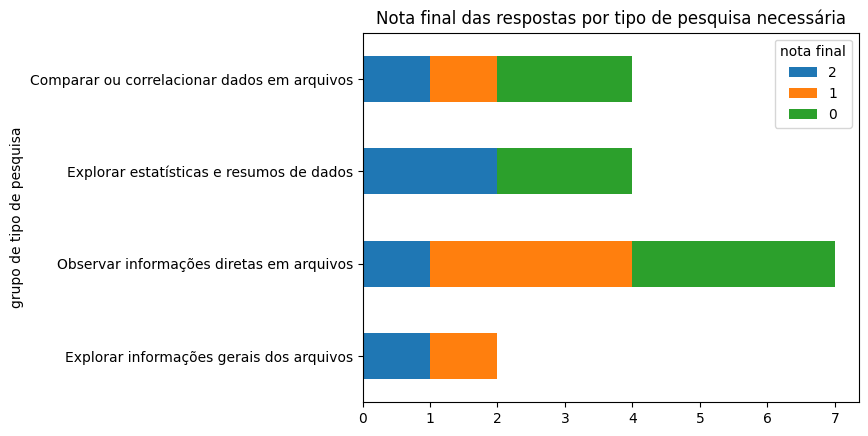

In [13]:
df_respostas.groupby(["grupo de tipo de pesquisa"], sort=False)["nota final"].value_counts().unstack().plot(kind='barh', stacked=True).set_title("Nota final das respostas por tipo de pesquisa necessária")

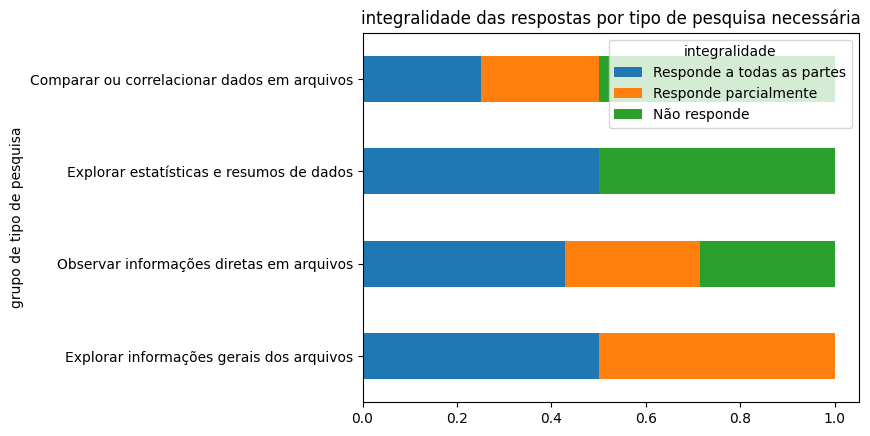

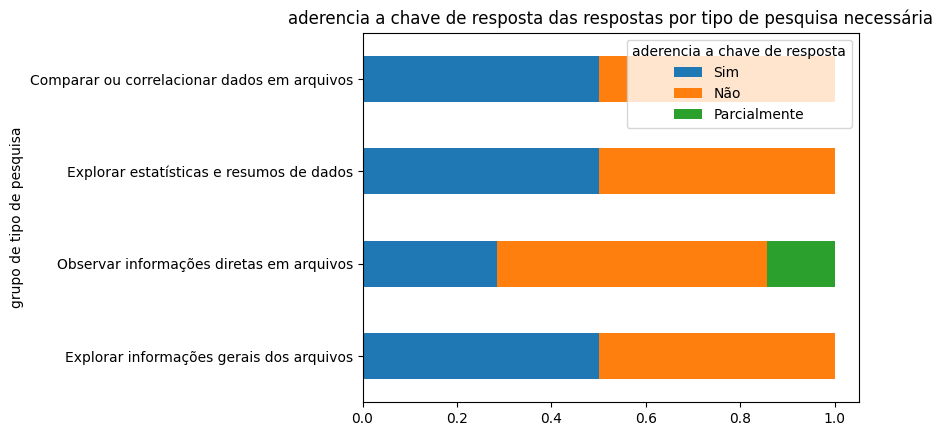

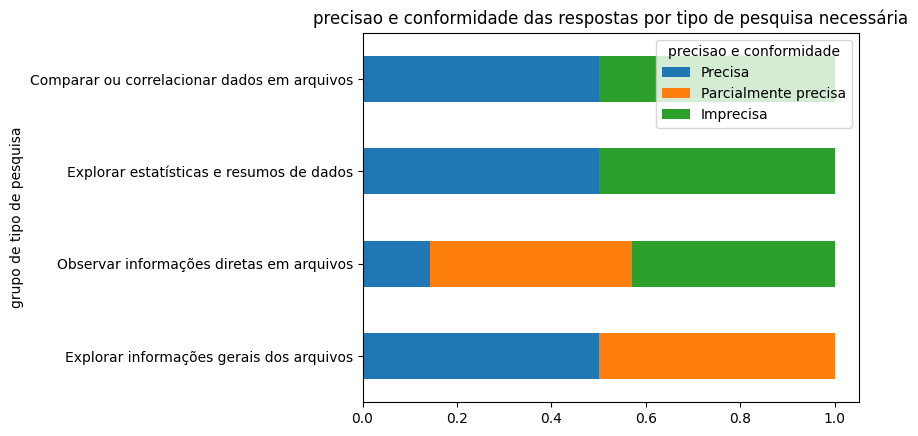

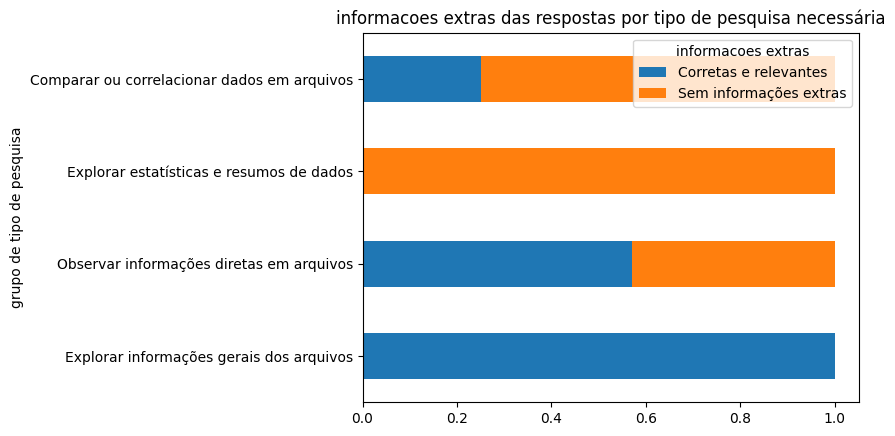

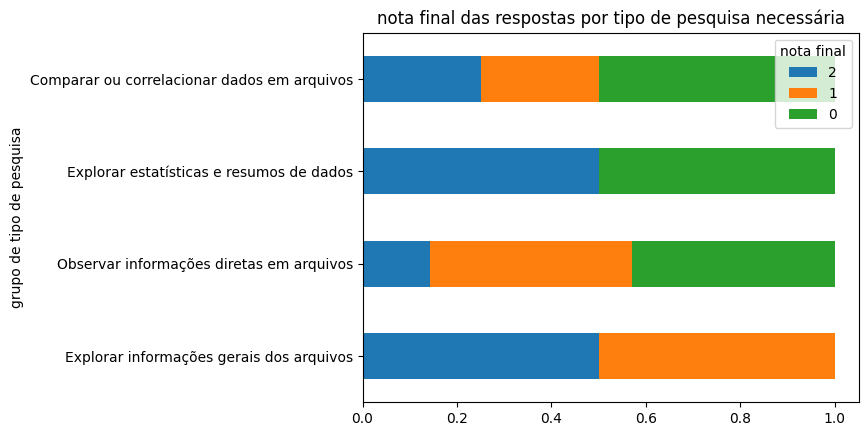

In [14]:
for criterio in ["integralidade", "aderencia a chave de resposta", "precisao e conformidade", "informacoes extras", "nota final"]:
    agg = df_respostas.groupby(["grupo de tipo de pesquisa"], sort=False)[criterio].value_counts(normalize=True).unstack().fillna(0)
    agg.plot(kind='barh', stacked=True).set_title(f"{criterio} das respostas por tipo de pesquisa necessária")

In [22]:
df_respostas.to_parquet(f"./respostas/respostas avaliadas base_2 - {modelo}.parquet")